In [69]:
import pandas as pd

# Informações gerais

In [70]:
df_rain = pd.read_csv('../datasets/rain_australia/weatherAUS.csv')
print(df_rain.shape)
print(df_rain.columns)

(145460, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [71]:
#distribuição da variável alvo
rain_tomorrow_counts = df_rain['RainTomorrow'].value_counts()
rain_tomorrow_percent = df_rain['RainTomorrow'].value_counts(normalize=True) * 100
rain_tomorrow_df = pd.DataFrame({
    'Contagem': rain_tomorrow_counts,
    'Percentual (%)': rain_tomorrow_percent.round(2)
})
print("Distribuição da variável alvo 'RainTomorrow':")
print(rain_tomorrow_df)

Distribuição da variável alvo 'RainTomorrow':
              Contagem  Percentual (%)
RainTomorrow                          
No              110316           77.58
Yes              31877           22.42


In [72]:
# menor dada:
min_date = df_rain['Date'].min()
print("Menor data:", min_date)
# maior data:
max_date = df_rain['Date'].max()
print("Maior data:", max_date)

Menor data: 2007-11-01
Maior data: 2017-06-25


In [73]:
# quantidade de estações únicas
unique_stations = df_rain['Location'].nunique()
print("Número de estações únicas:", unique_stations)

Número de estações únicas: 49


In [74]:
# quantidade de valores ausentes por coluna
total = len(df_rain)
missing_count = df_rain.isna().sum()
missing_percent = (missing_count / total * 100).round(2)

missing_df = pd.DataFrame({
    'Quantidade ausente': missing_count,
    'Percentual (%)': missing_percent
}).sort_values('Quantidade ausente', ascending=False)

print(f"Total de linhas: {total}\n")
print(missing_df)

Total de linhas: 145460

               Quantidade ausente  Percentual (%)
Sunshine                    69835           48.01
Evaporation                 62790           43.17
Cloud3pm                    59358           40.81
Cloud9am                    55888           38.42
Pressure9am                 15065           10.36
Pressure3pm                 15028           10.33
WindDir9am                  10566            7.26
WindGustDir                 10326            7.10
WindGustSpeed               10263            7.06
Humidity3pm                  4507            3.10
WindDir3pm                   4228            2.91
Temp3pm                      3609            2.48
RainTomorrow                 3267            2.25
Rainfall                     3261            2.24
RainToday                    3261            2.24
WindSpeed3pm                 3062            2.11
Humidity9am                  2654            1.82
WindSpeed9am                 1767            1.21
Temp9am                  

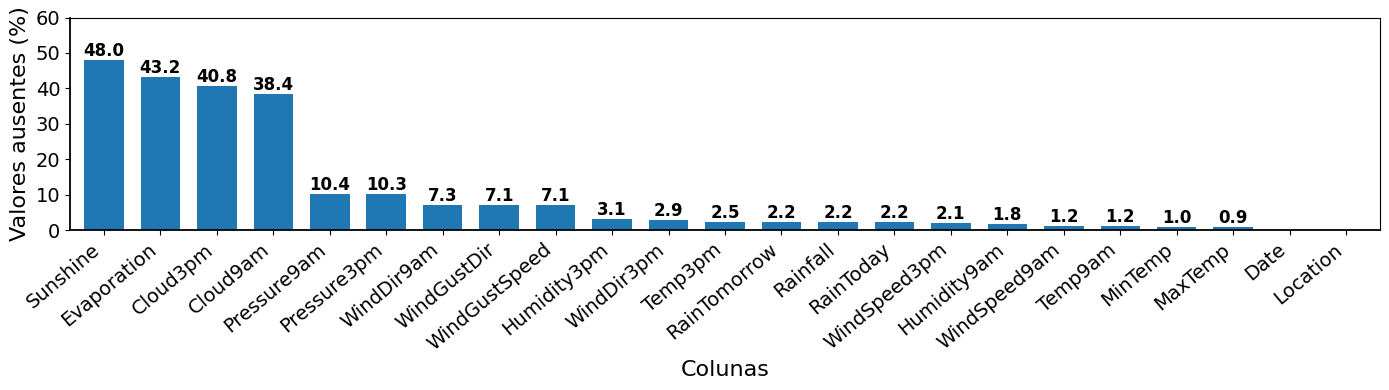

In [ ]:
import matplotlib.pyplot as plt

# calcular percentuais de valores ausentes por coluna e ordenar decrescente
missing_percent = (df_rain.isna().sum() / len(df_rain) * 100).sort_values(ascending=False)

# ajustar altura da figura conforme número de colunas
n_cols = len(missing_percent)
plt.figure(figsize=(max(14, n_cols * 0.5), 4))

# plot vertical
ax = missing_percent.plot(kind='bar', color='tab:blue', width=0.7)

ax.set_ylim(0, 60)

# rótulos dos eixos (sem título)
plt.ylabel('Valores ausentes (%)', fontsize=16)
plt.xlabel('Colunas', fontsize=16)
plt.xticks(rotation=40, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# adicionar rótulos apenas se houver espaço suficiente
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold',
                    xytext=(0, 0), textcoords='offset points')

# estética geral
ax.spines['bottom'].set_linewidth(1.3)
ax.spines['left'].set_linewidth(1.3)
plt.tight_layout()
plt.show()


Serão eliminadas colunas com mais de 35% de valores ausentes. Nesse caso, serão: 
'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'

Além disso, a coluna data não tem interesse nessa tarefa de classificação.

Depois disso, os registros com valores ausentes serão removidos

In [26]:
df_rain = df_rain.drop(columns=['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], errors='ignore')
df_rain = df_rain.dropna()
print("Após limpeza:")
print(f"quantidade de linhas: {len(df_rain)}")
print(f"quantidade de colunas: {len(df_rain.columns)}")
print(f"quantidade de localidades: {df_rain['Location'].nunique()}")
df_rain.head()

Após limpeza:
quantidade de linhas: 112925
quantidade de colunas: 18
quantidade de localidades: 44


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [27]:
# Convertendo variáveis sim ou não em numéricas
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].map({'No': 0, 'Yes': 1})
df_rain['RainToday'] = df_rain['RainToday'].map({'No': 0, 'Yes': 1})

In [28]:
#distribuição da variável alvo
rain_tomorrow_counts = df_rain['RainTomorrow'].value_counts()
rain_tomorrow_percent = df_rain['RainTomorrow'].value_counts(normalize=True) * 100
rain_tomorrow_df = pd.DataFrame({
    'Contagem': rain_tomorrow_counts,
    'Percentual (%)': rain_tomorrow_percent.round(2)
})
print("Distribuição da variável alvo 'RainTomorrow':")
print(rain_tomorrow_df)

Distribuição da variável alvo 'RainTomorrow':
              Contagem  Percentual (%)
RainTomorrow                          
0                87906           77.84
1                25019           22.16


In [29]:
# distribuição da variável alvo 'RainTomorrow' por localidade
rain_tomorrow_by_location = df_rain.groupby('Location')['RainTomorrow'].value_counts(normalize=True).unstack().fillna(0) * 100
#arrendonar os valores para duas casas decimais
rain_tomorrow_by_location = rain_tomorrow_by_location.round(2)
#renomear colunas
rain_tomorrow_by_location = rain_tomorrow_by_location.rename(columns={0: 'No (%)', 1: 'Yes (%)'})
print("Distribuição da variável alvo 'RainTomorrow' por localidade (%):")
print(rain_tomorrow_by_location)

Distribuição da variável alvo 'RainTomorrow' por localidade (%):
RainTomorrow      No (%)  Yes (%)
Location                         
Adelaide           77.19    22.81
Albury             78.40    21.60
AliceSprings       91.73     8.27
BadgerysCreek      80.08    19.92
Ballarat           73.90    26.10
Bendigo            81.02    18.98
Brisbane           78.08    21.92
Cairns             68.61    31.39
Canberra           81.54    18.46
Cobar              87.20    12.80
CoffsHarbour       70.42    29.58
Dartmoor           66.43    33.57
Darwin             73.79    26.21
GoldCoast          74.02    25.98
Hobart             76.08    23.92
Katherine          84.78    15.22
Launceston         76.01    23.99
Melbourne          76.67    23.33
MelbourneAirport   78.25    21.75
Mildura            89.13    10.87
Moree              87.22    12.78
MountGambier       69.65    30.35
Nhil               84.45    15.55
NorahHead          72.21    27.79
NorfolkIsland      69.17    30.83
Nuriootpa        

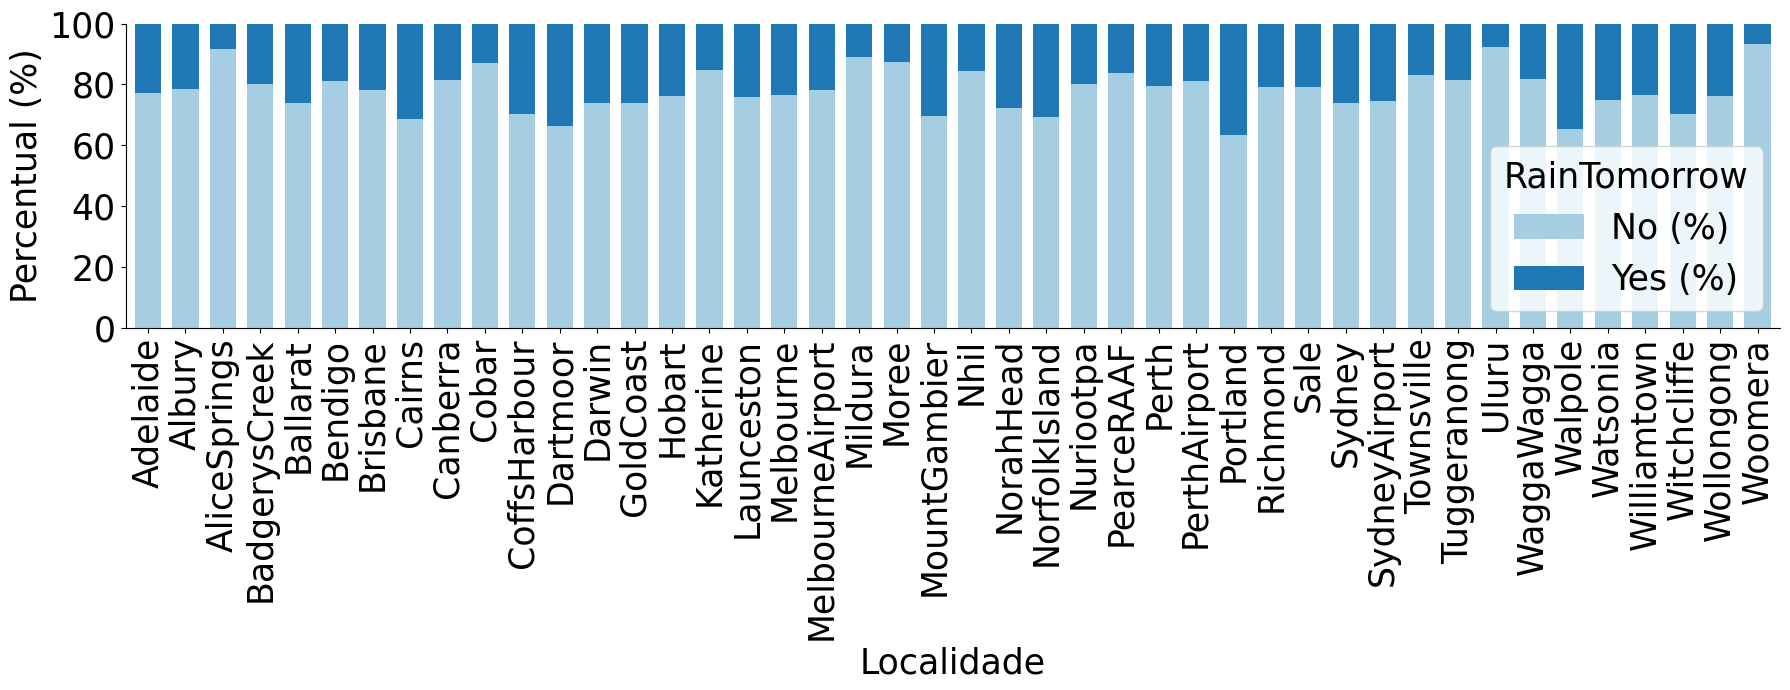

In [66]:
import matplotlib.pyplot as plt

# ordenar por nome da localidade (ordem alfabética)
rain_tomorrow_by_location_sorted = rain_tomorrow_by_location.sort_index()

# criar figura mais larga e mais baixa
fig, ax = plt.subplots(figsize=(18, 7))

# plotar barras empilhadas verticais
rain_tomorrow_by_location_sorted[['No (%)', 'Yes (%)']].plot(
    kind='bar',
    stacked=True,
    color=['#a6cee3', '#1f78b4'],
    ax=ax,
    width=0.7
)

# rótulos e eixos
plt.ylabel("Percentual (%)", fontsize=25)
plt.xlabel("Localidade", fontsize=25)

# aumentar fonte e espaçamento dos nomes das localidades
plt.xticks(rotation=90, fontsize=25, ha='center')
plt.yticks(fontsize=25)

# legenda
plt.legend(title="RainTomorrow", loc='lower right', fontsize=25, title_fontsize=25)
# remover título e bordas desnecessárias
ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ajustar limites do eixo Y para reduzir a altura das barras
ax.set_ylim(0, 100)  # em vez de até 100%, para compactar visualmente

plt.tight_layout()
plt.show()


In [ ]:
# Salvando o dataframe limpo em um novo arquivo CSV
df_rain.to_csv('../datasets/rain_australia/weatherAUS_cleaned.csv', index=False)

In [ ]:
# 1. Verificar número de localizações
df = pd.read_csv('../datasets/rain_australia/weatherAUS_cleaned.csv')
print(f"✓ Localizações únicas: {df['Location'].nunique()}")
print(f"  Localizações: {sorted(df['Location'].unique())}")

# 2. Verificar colunas categóricas
print(f"\n✓ WindGustDir valores únicos: {df['WindGustDir'].nunique()}")
print(f"  Valores: {sorted(df['WindGustDir'].dropna().unique())}")

# 3. Verificar RainToday
print(f"\n✓ RainToday tipo: {df['RainToday'].dtype}")
print(f"  Valores únicos: {df['RainToday'].unique()}")

# 4. Verificar RainTomorrow (target)
print(f"\n✓ RainTomorrow tipo: {df['RainTomorrow'].dtype}")
print(f"  Valores únicos: {df['RainTomorrow'].unique()}")

# 5. Verificar se há NaN após dropna
df_clean = df.dropna()
print(f"\n✓ Linhas com NaN após dropna: {df_clean.isna().sum().sum()}")

# 6. Verificar distribuição por localização
print(f"\n✓ Distribuição por localização:")
print(df['Location'].value_counts().sort_index())

✓ Localizações únicas: 44
  Localizações: ['Adelaide', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']

✓ WindGustDir valores únicos: 16
  Valores: ['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW']

✓ RainToday tipo: int64
  Valores únicos: [0 1]

✓ RainTomorrow tipo: int64
  Valores únicos: [0 1]

✓ Linhas com NaN após dropna: 0

✓ Distribuição por localização:
Location
Adelaide            2740
Albury              2440
AliceSprings        2744
Bad

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy

# parâmetros
label_col = 'RainTomorrow'   # coluna target
client_col = 'Location'      # coluna que separa os clientes
eps = 1e-9                   # suavização para evitar zeros
min_samples_filter = 30      # filtrar locations com poucos exemplos

# distribuições globais
labels_order = ['No', 'Yes']
global_counts = df_rain[label_col].value_counts().reindex(labels_order).fillna(0).astype(float)
global_prob = (global_counts + eps) / (global_counts.sum() + 2*eps)

def safe_probs_from_counts(counts, labels=labels_order, eps=1e-9):
    c = counts.reindex(labels).fillna(0).astype(float)
    p = (c + eps) / (c.sum() + eps * len(labels))
    return p.values

rows = []
grouped = df_rain.groupby(client_col)

for loc, g in grouped:
    n = len(g)
    counts = g[label_col].value_counts()
    probs = safe_probs_from_counts(counts, eps=eps)

    # Jensen-Shannon distance (scipy returns JS distance = sqrt(JS divergence))
    js_dist = jensenshannon(probs, global_prob.values)
    # KL divergence (KL(p || global))
    kl_div = entropy(probs, global_prob.values)
    # Hellinger distance
    hellinger = np.sqrt(0.5 * np.sum((np.sqrt(probs) - np.sqrt(global_prob.values))**2))
    # Entropy of local distribution (measure of "balance")
    ent = entropy(probs)

    rows.append({
        client_col: loc,
        'n_samples': n,
        'p_No': probs[0],
        'p_Yes': probs[1],
        'jsd': float(js_dist),
        'kl_p_global': float(kl_div),
        'hellinger': float(hellinger),
        'entropy': float(ent)
    })

metrics_df = pd.DataFrame(rows).sort_values('jsd', ascending=False).reset_index(drop=True)

# filtrar locations pequenos
metrics_df_filtered = metrics_df[metrics_df['n_samples'] >= min_samples_filter].copy()

# estatísticas resumidas
mean_jsd = metrics_df_filtered['jsd'].mean()
median_jsd = metrics_df_filtered['jsd'].median()
max_jsd = metrics_df_filtered['jsd'].max()

print(f'Global dist (No/Yes): {global_prob.values}')
print(f'Locations considered (>= {min_samples_filter} samples): {len(metrics_df_filtered)}')
print(f'mean JSD: {mean_jsd:.4f}, median JSD: {median_jsd:.4f}, max JSD: {max_jsd:.4f}')

# mostrar top 20 mais divergentes
display(metrics_df_filtered.head(20))

# salvar tabela
metrics_df_filtered.to_csv('label_skew_by_location.csv', index=False)


Global dist (No/Yes): [0.5 0.5]
Locations considered (>= 30 samples): 44
mean JSD: 0.0000, median JSD: 0.0000, max JSD: 0.0000


,Location,n_samples,p_No,p_Yes,jsd,kl_p_global,hellinger,entropy
0,Adelaide,2740,0.5,0.5,0.0,0.0,0.0,0.693147
1,Albury,2440,0.5,0.5,0.0,0.0,0.0,0.693147
2,AliceSprings,2744,0.5,0.5,0.0,0.0,0.0,0.693147
3,BadgerysCreek,2334,0.5,0.5,0.0,0.0,0.0,0.693147
4,Ballarat,2854,0.5,0.5,0.0,0.0,0.0,0.693147
5,Bendigo,2713,0.5,0.5,0.0,0.0,0.0,0.693147
6,Brisbane,3020,0.5,0.5,0.0,0.0,0.0,0.693147
7,Cairns,2899,0.5,0.5,0.0,0.0,0.0,0.693147
8,Canberra,2725,0.5,0.5,0.0,0.0,0.0,0.693147
9,Cobar,2804,0.5,0.5,0.0,0.0,0.0,0.693147
